In [951]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

In [952]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [953]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

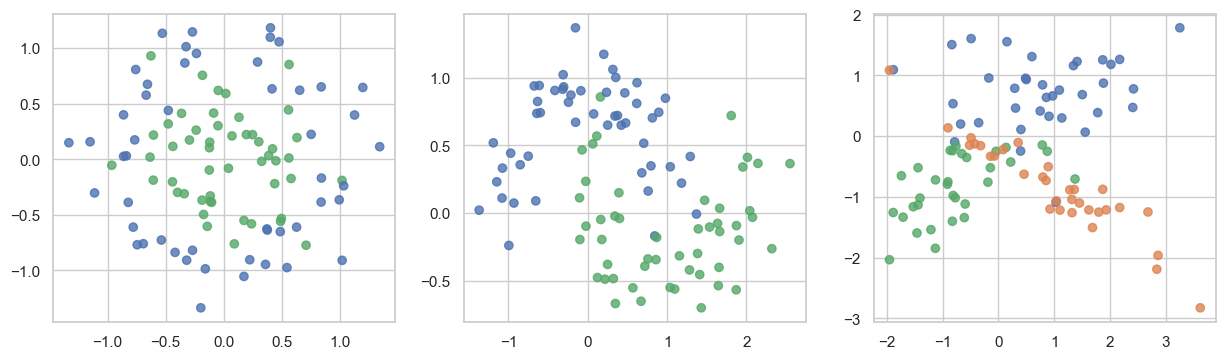

In [954]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

In [955]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

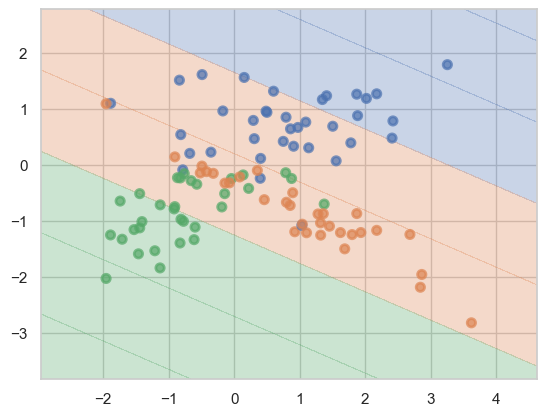

In [956]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

0.7


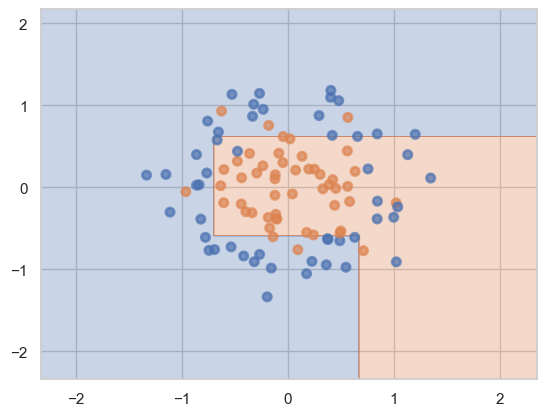

1.0


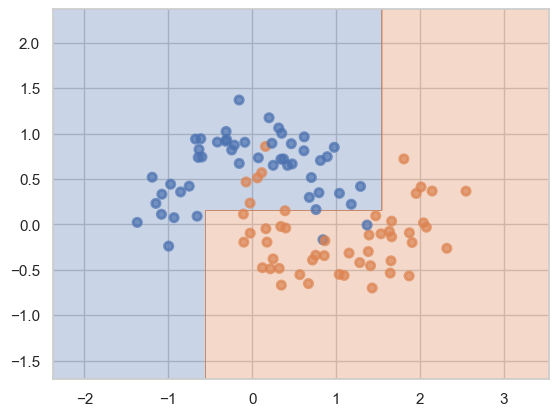

0.75


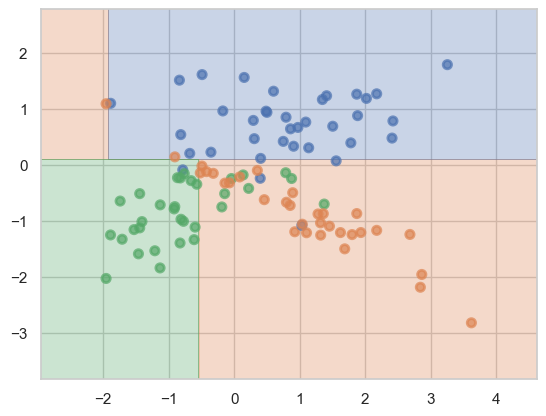

In [957]:
from sklearn.metrics import accuracy_score



for i in range(len(datasets)):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    plot_surface(clf, X, y)
    plt.show()

- Более точное разделение прямыми, паралельными оси X и Y 
- Хорошо обработаны нелинейные зависимости 
- На третьем графике модель обнаружела три признака
- Наиболее точное разделение, судя по графикам, наблюается на втором датасете

In [958]:
params_md = [1, 3, 5, None]
params_leaf = [1, 5, 10]
for i in range(len(datasets)):
    X, y = datasets[i]
    for md in params_md:
        for leaf in params_leaf:
            clf = DecisionTreeClassifier(max_depth=md, min_samples_leaf=leaf, random_state=42)
            clf.fit(X_train, y_train)
            print('Точность:', accuracy_score(y_test, clf.predict(X_test)), f'при max_depth={md} и min_samples_leaf={leaf}')
    

Точность: 0.55 при max_depth=1 и min_samples_leaf=1
Точность: 0.55 при max_depth=1 и min_samples_leaf=5
Точность: 0.55 при max_depth=1 и min_samples_leaf=10
Точность: 0.75 при max_depth=3 и min_samples_leaf=1
Точность: 0.75 при max_depth=3 и min_samples_leaf=5
Точность: 0.75 при max_depth=3 и min_samples_leaf=10
Точность: 0.7 при max_depth=5 и min_samples_leaf=1
Точность: 0.7 при max_depth=5 и min_samples_leaf=5
Точность: 0.75 при max_depth=5 и min_samples_leaf=10
Точность: 0.7 при max_depth=None и min_samples_leaf=1
Точность: 0.7 при max_depth=None и min_samples_leaf=5
Точность: 0.75 при max_depth=None и min_samples_leaf=10
Точность: 0.55 при max_depth=1 и min_samples_leaf=1
Точность: 0.55 при max_depth=1 и min_samples_leaf=5
Точность: 0.55 при max_depth=1 и min_samples_leaf=10
Точность: 0.75 при max_depth=3 и min_samples_leaf=1
Точность: 0.75 при max_depth=3 и min_samples_leaf=5
Точность: 0.75 при max_depth=3 и min_samples_leaf=10
Точность: 0.7 при max_depth=5 и min_samples_leaf=1
То

- При значении max_depth = 3, min_samples_leaf не оказывает на точность эффекта - она остается равной 0,75
- Подбор параметра min_samples_leaf может осуществляться в целях избежания переобучения

In [959]:
from importlib import reload
from tree_code import find_best_split
# reload(find_best_split)
# from tree_code import find_best_split

In [960]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


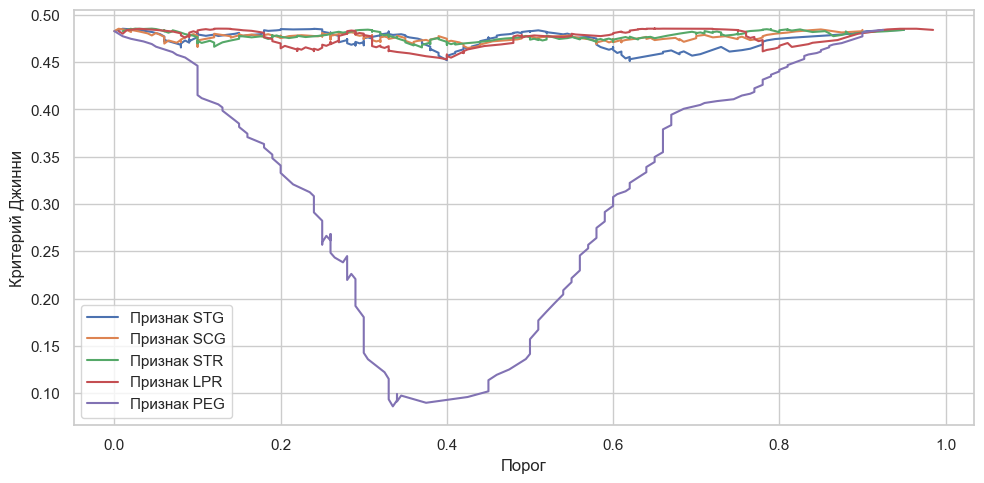

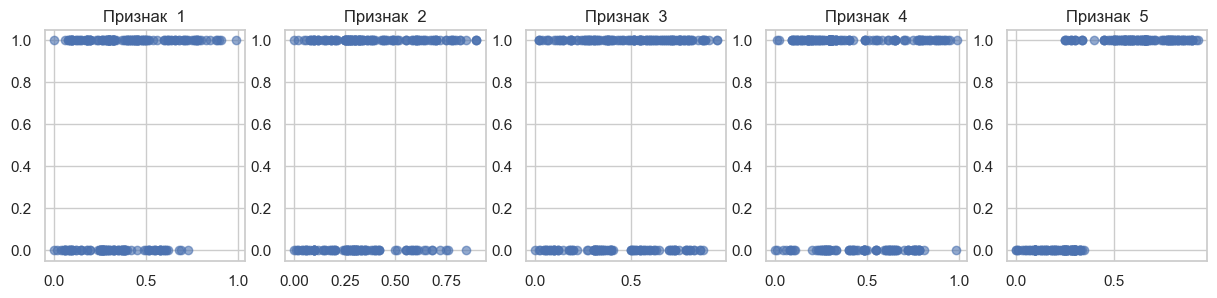

In [961]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].to_numpy()
plt.figure(figsize=(10, 5))
col_names = df.columns
for i in range(5):
    t, g, _, _ = find_best_split(X.iloc[:, i].to_numpy(), y)
    plt.plot(t, g, label=f'Признак {col_names[i]}')
plt.xlabel('Порог'), plt.ylabel('Критерий Джинни')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].scatter(X.iloc[:, i], y, alpha=0.6)
    axs[i].set_title(f'Признак  {i+1}')
plt.show()

- Наиболее удачный: PEG
- Да, совпадает 
- Чем четче минимум виден на графике, тем лучше (чем больше походит на U)) 

In [962]:
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [963]:
import re

with open("agaricus-lepiota.names", "r", encoding="utf-8") as f:
    text = f.read()

match = re.search(r'Attribute Information:(.*)', text, re.DOTALL | re.IGNORECASE)
featers = match.group(1)
columns = re.findall(r'^\s*\d+\.\s+([a-zA-Z0-9?-]+):', featers, re.MULTILINE)
print(len(columns))
print(columns)



22
['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [964]:
columns.insert(0, 'classes')
print(columns)

['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [965]:
df = pd.read_csv("agaricus-lepiota.data", header=None, names=columns)
df_aga = df.copy()
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


LabelEncoder

In [966]:
from sklearn.preprocessing import LabelEncoder

for column in columns:
    df[column] = LabelEncoder().fit_transform(df[column])    

In [967]:
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [968]:
X = df.drop('classes', axis=1).values
y = df.classes.values

X_y = [(X, y)]

In [969]:
featers_types = len(columns)*['categorical']
notYetHalf = np.random.permutation(X.shape[0])
train_id, test_id = notYetHalf[:(len(notYetHalf) // 2)], notYetHalf[(len(notYetHalf) // 2):]
print(len(train_id), len(test_id))
X_train, X_test, y_train, y_test = X[train_id], X[test_id], y[train_id], y[test_id]

from tree_code import DecisionTree as DT
dt = DT(feature_types=featers_types)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy) 

4062 4062
accuracy: 0.9997538158542589


In [970]:
df_tic_tac = pd.read_csv('tic-tac-toe-endgame.csv')
df_tic_tac_one = df_tic_tac.copy()
print(df_tic_tac.head(2))
for column in df_tic_tac.columns:
    df_tic_tac[column] = LabelEncoder().fit_transform(df_tic_tac[column])  
    
X_tic_tac, y_tic_tac = df_tic_tac.drop('V10', axis=1).values, df_tic_tac['V10'].values

X_y.append((X_tic_tac, y_tic_tac))

  V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive


In [971]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X_car = car_evaluation.data.features 
y_car = car_evaluation.data.targets 
  
# # metadata 
# print(car_evaluation.metadata) 
  
# # variable information 
# print(car_evaluation.variables) 
X_car_one = X_car.copy()

In [972]:
y_car.loc[y_car['class'] == 'unacc', 'class'] = 0
y_car.loc[y_car['class'] == 'acc', 'class'] = 0

y_car.loc[y_car['class'] == 'good', 'class'] = 1
y_car.loc[y_car['class'] == 'vgood', 'class'] = 1

In [973]:
print(y_car.values.ravel().astype(int))

[0 0 0 ... 0 1 1]


In [974]:
# y_car = LabelEncoder().fit_transform(y_car) 
for x in X_car.columns:
    X_car[x] = LabelEncoder().fit_transform(X_car[x]) 
    
X_y.append((X_car.values, y_car.values.ravel().astype(int)))

In [975]:
# fetch dataset 
nursery = fetch_ucirepo(id=76) 
  
# data (as pandas dataframes) 
X_nurs = nursery.data.features 
y_nurs = nursery.data.targets 
  
# # metadata 
# print(nursery.metadata) 
  
# # variable information 
# print(nursery.variables) 
X_nursOne = X_nurs.copy()

In [976]:
# y_nurs = LabelEncoder().fit_transform(y_nurs) 

y_nurs.loc[y_nurs['class'] == 'not_recom', 'class'] = 0
y_nurs.loc[y_nurs['class'] == 'recommend', 'class'] = 0

y_nurs.loc[y_nurs['class'] == 'very_recom', 'class'] = 1
y_nurs.loc[y_nurs['class'] == 'priority', 'class'] = 1
y_nurs.loc[y_nurs['class'] == 'spec_prior', 'class'] = 1

for x in X_nurs.columns:
    X_nurs[x] = LabelEncoder().fit_transform(X_nurs[x]) 
    
X_y.append((X_nurs.values, y_nurs.values.ravel().astype(int))) 

In [977]:
import tree_code
reload(tree_code)
# from tree_code import DecisionTree
from tree_code import DecisionTree as DT

In [978]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.base import BaseEstimator, ClassifierMixin

class DTsklearn(BaseEstimator, ClassifierMixin):
    def __init__(self, featers_types):
        self.featers_types = featers_types
    
    def fit(self, X, y):
        self.model = DT(self.featers_types)
        self.model.fit(X, y)
        self.classes_ = np.unique(y)
        return self
    
    def predict(self, X):
        return np.array(self.model.predict(X)) 

cvs_cat = []
for i in range(len(X_y)):
    featers_types = ['categorical'] * len(X_y[i][0][0])
    # model = DT(feature_types=featers_types)
    model = DTsklearn(featers_types=featers_types)
    cvs = cross_val_score(model, X=X_y[i][0], y=X_y[i][1], cv=10, scoring=make_scorer(accuracy_score), error_score='raise')
    print("cross_val_score:", cvs)
    print("Средняя точность:", cvs.mean())
    cvs_cat.append(cvs.mean())

cross_val_score: [1.         1.         1.         1.         0.99753695 1.
 1.         0.48152709 0.8226601  0.99014778]
Средняя точность: 0.9291871921182265
cross_val_score: [0.39583333 0.65625    0.40625    0.65625    0.65625    0.57291667
 0.69791667 0.75       0.65263158 0.65263158]
Средняя точность: 0.6096929824561403
cross_val_score: [1.         0.92485549 0.76878613 0.98265896 0.97109827 1.
 0.65317919 0.24855491 0.97093023 0.1627907 ]
Средняя точность: 0.7682853878209437
cross_val_score: [0.99845679 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Средняя точность: 0.9998456790123458


In [979]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.base import BaseEstimator, ClassifierMixin

class DTsklearn(BaseEstimator, ClassifierMixin):
    def __init__(self, featers_types):
        self.featers_types = featers_types
    
    def fit(self, X, y):
        self.model = DT(self.featers_types)
        self.model.fit(X, y)
        self.classes_ = np.unique(y)
        return self
    
    def predict(self, X):
        return np.array(self.model.predict(X)) 

cvs_real = []
for i in range(len(X_y)):
    featers_types = ['real'] * len(X_y[i][0][0])
    # model = DT(feature_types=featers_types)
    model = DTsklearn(featers_types=featers_types)
    cvs = cross_val_score(model, X=X_y[i][0], y=X_y[i][1], cv=10, scoring=make_scorer(accuracy_score), error_score='raise')
    print("cross_val_score:", cvs)
    print("Средняя точность:", cvs.mean())
    cvs_real.append(cvs.mean())

cross_val_score: [0.51783518 0.51783518 0.51783518 0.51783518 0.51724138 0.51724138
 0.51970443 0.51970443 0.54064039 0.53817734]
Средняя точность: 0.5224050073013045
cross_val_score: [0.48958333 0.77083333 0.875      0.84375    0.85416667 0.84375
 0.76041667 0.86458333 0.83157895 0.72631579]
Средняя точность: 0.785997807017544
cross_val_score: [0.92485549 0.92485549 0.92485549 0.92485549 0.91907514 0.91907514
 0.91907514 0.91907514 0.9244186  0.81976744]
Средняя точность: 0.911990858986423
cross_val_score: [0.99845679 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Средняя точность: 0.9998456790123458


OneHotEncoder

In [980]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class DTsklearn(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.encoder = OneHotEncoder(handle_unknown='ignore')
        X_ones = self.encoder.fit_transform(X)
        featers_types = ['real'] * X_ones.shape[1]
        
        self.model = DT(featers_types)
        self.model.fit(X_ones, y)
        self.classes_ = np.unique(y)
        return self
    
    def predict(self, X):
        X_test = self.encoder.transform(X) 
        return np.array(self.model.predict(X_test))


In [981]:
model1, model2, model3, model4 = DTsklearn(), DTsklearn(), DTsklearn(), DTsklearn()

In [982]:
# df_tic_tac_one = df_tic_tac_one.drop('V10', axis=1)
X_car_one1 = X_car_one.copy()
X_nursOne1 = X_nursOne.copy()

In [983]:
X_tic_tac_one = df_tic_tac_one.drop('V10', axis=1)
X_aga = df_aga.drop('classes', axis=1)

In [984]:
cvs_one = []
# Для tic-tac
# model1.fit(X_car_one, y_car)
cvs1 = cross_val_score(model1, X_tic_tac_one, y_tic_tac, cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_one.append(cvs1.mean())

# Для Agaricus
cvs2 = cross_val_score(model2, X_aga, y, cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_one.append(cvs2.mean())

# Для Car 
cvs3 = cross_val_score(model3, X_car_one1, y_car.values.ravel().astype(int), cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_one.append(cvs3.mean())

# Для Nursery
cvs4 = cross_val_score(model4, X_nursOne1, y_nurs.values.ravel().astype(int), cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_one.append(cvs3.mean())

In [985]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class DTsklearn1(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.encoder = OneHotEncoder(handle_unknown='ignore')
        X_ones = self.encoder.fit_transform(X)
        # featers_types = ['real'] * X_ones.shape[1]
        
        self.model = DecisionTreeClassifier(criterion="gini")
        self.model.fit(X_ones, y)
        self.classes_ = np.unique(y)
        return self
    
    def predict(self, X):
        X_test = self.encoder.transform(X) 
        return np.array(self.model.predict(X_test))


In [986]:
# model1, model2, model3, model4 = DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier()
model1, model2, model3, model4 = DTsklearn1(), DTsklearn1(), DTsklearn1(), DTsklearn1()

cvs_dst = []
# Для tic-tac
# model1.fit(X_car_one, y_car)
cvs1 = cross_val_score(model1, X_tic_tac_one, y_tic_tac, cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_dst.append(cvs1.mean())

# Для Agaricus
cvs2 = cross_val_score(model2, X_aga, y, cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_dst.append(cvs2.mean())

# Для Car 
cvs3 = cross_val_score(model3, X_car_one1, y_car.values.ravel().astype(int), cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_dst.append(cvs3.mean())

# Для Nursery
cvs4 = cross_val_score(model4, X_nursOne1, y_nurs.values.ravel().astype(int), cv=10, scoring=make_scorer(accuracy_score), error_score='raise') 
cvs_dst.append(cvs3.mean())

In [987]:
d = {
    'DecisionTree + real + LabelEncoder': cvs_real,
    'DecisionTree + categorical + LabelEncoder': cvs_cat,
    'DecisionTree + one-hot encoding + real': cvs_one,
    'DecisionTreeClassifier + one-hot encoding': cvs_dst
}

df_cvs = pd.DataFrame(d)
df_cvs.index = ['tic-tac-toe-endgame', 'agaricus-lepiota', 'car', 'agaricus-lepiota']
df_cvs

,DecisionTree + real + LabelEncoder,DecisionTree + categorical + LabelEncoder,DecisionTree + one-hot encoding + real,DecisionTreeClassifier + one-hot encoding
tic-tac-toe-endgame,0.522405,0.929187,0.653443,0.819583
agaricus-lepiota,0.785998,0.609693,0.517972,0.968265
car,0.911991,0.768285,0.922456,0.833032
agaricus-lepiota,0.999846,0.999846,0.922456,0.833032


- В зависимости от датасета, методы показывают разные результаты
- Стабильно высокий - DecisionTreeClassifier + one-hot encoding
- Алгоритмы ранжируются по-разному, что может быть вызвано различием в данных (структуре, типе, масштабе)
- Категориальные значения с большим количеством признаков ведут к большему кол-ву разбиений, решением может быть совмещение признаков
- Случайность в работе метдов и cross_val_score - фиксация random_state может помочь